#MOVIE RATING PREDICTION WITH PYTHON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')


In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.shape

(15509, 10)

In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [9]:
#Dealing with the missing values
#The rows from our dataset where the 'Rating' information was not available is droppped
df.dropna(subset=['Rating'], inplace=True)

In [10]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [11]:
df.shape

(7919, 10)

In [12]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [13]:
#Change the data type of both Year and Votes column to numerical data types

df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [14]:
df.dtypes

,0
Name,object
Year,int64
Duration,object
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [15]:
#The missing entries in Genre will be replaced by Unknown

df['Genre'].fillna('Unknown', inplace=True)


In [16]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
# Impute missing values in 'Duration' with the median
df['Duration'] = pd.to_numeric(df['Duration'].str.extract(r'(\d+)')[0], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Drop rows with missing values in 'Actor 1', 'Actor 2', and 'Actor 3'
df = df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'])

# Check for any remaining missing values
print(df.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [22]:
#Here we have clean data now we do some predication
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


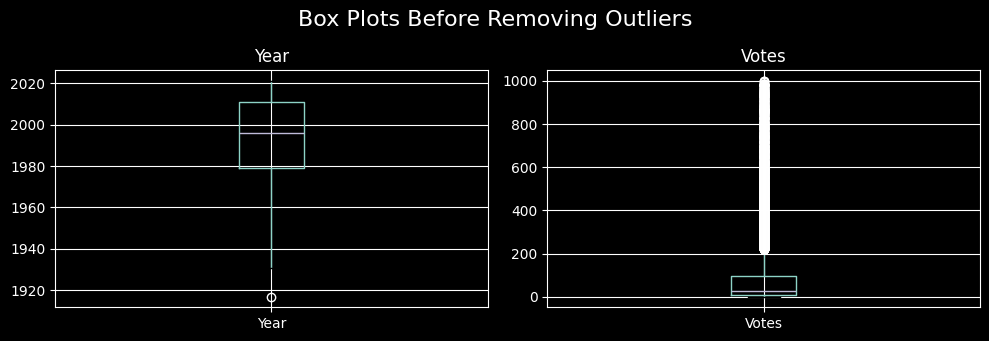

In [24]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Votes']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [25]:
#Using dataframe Check for outliers and remove them

import pandas as pd

# Define a function to identify and remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


# Remove outliers from numerical columns: Duration, Rating, Votes, Year
for col in ['Duration','Rating','Votes','Year']:
    df = remove_outliers_iqr(df,col)
# Reset the index after removing rows
df = df.reset_index(drop = True)


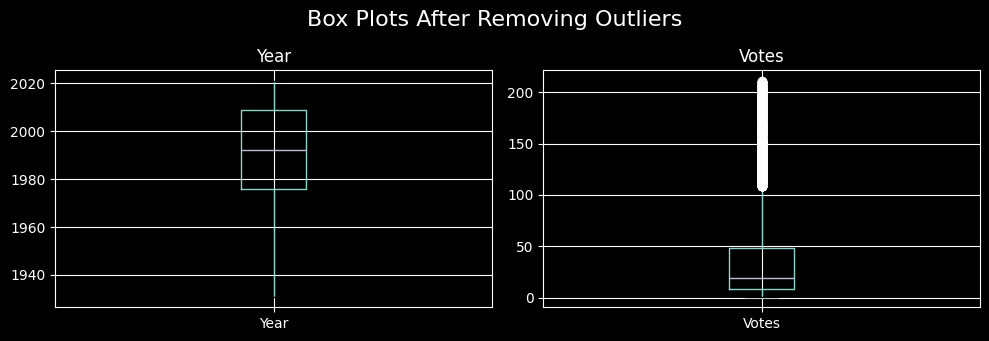

Number of rows after removing outliers: 5898


In [26]:
# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

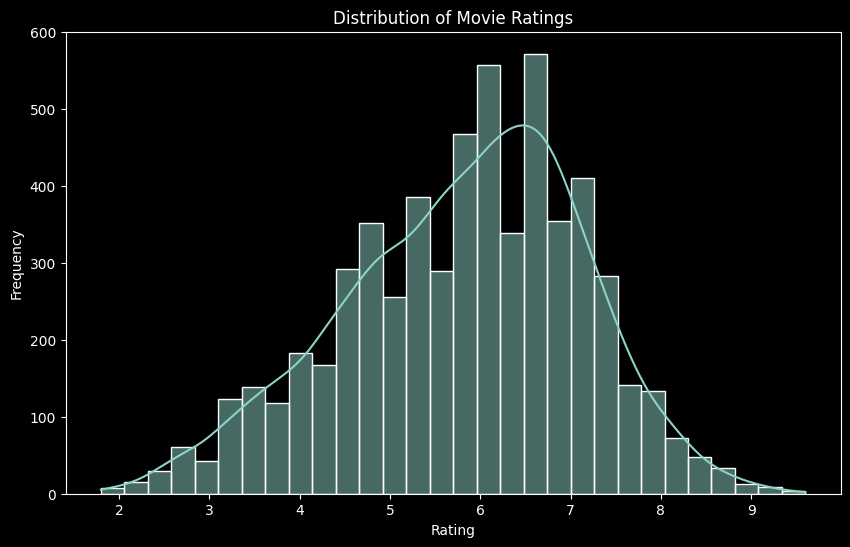

In [27]:
#Rating Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

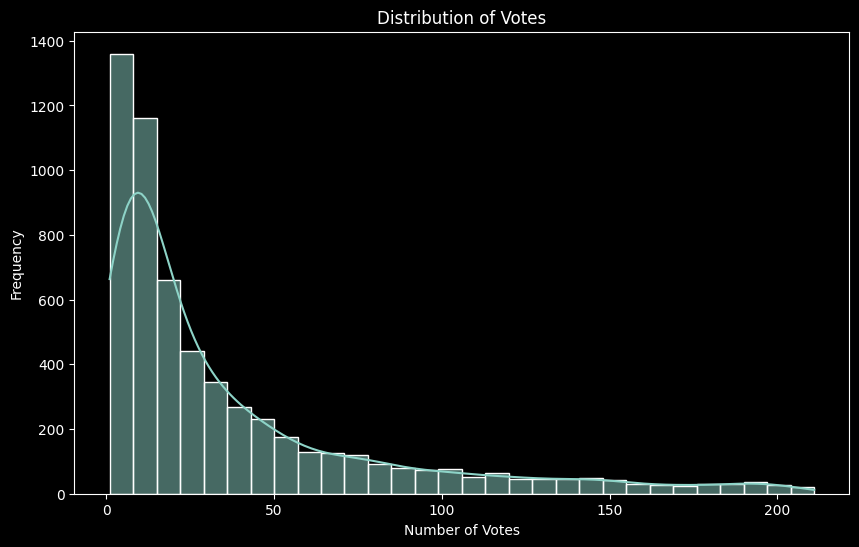

In [28]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

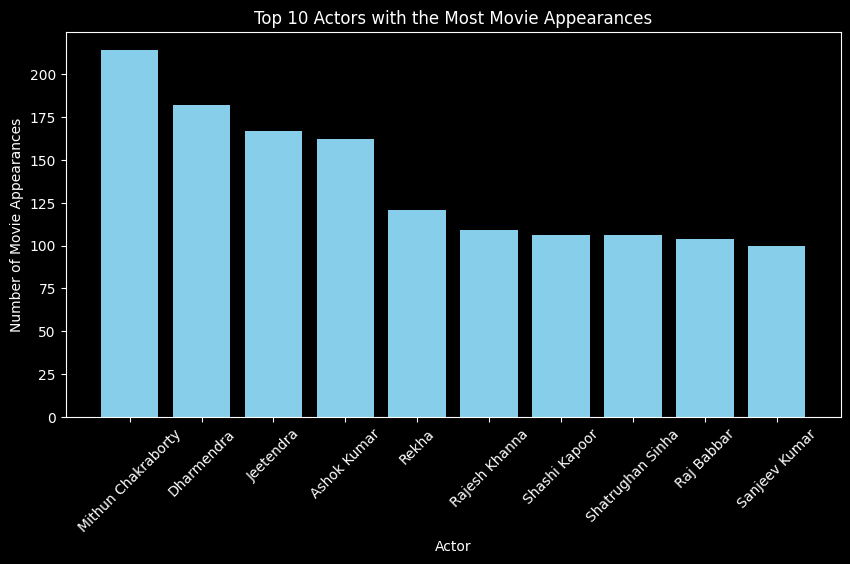

In [29]:
# Count the number of movies in which each actor starred
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()

# Select the top 10 actors with the most movie appearances
top_10_actors = actor_counts.head(10)

# Create a bar plot to visualize the top 10 actors with the most movie appearances
plt.figure(figsize=(10, 5))
plt.bar(top_10_actors.index, top_10_actors.values, color='skyblue')
plt.title('Top 10 Actors with the Most Movie Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Movie Appearances')
plt.xticks(rotation=45)
plt.show()

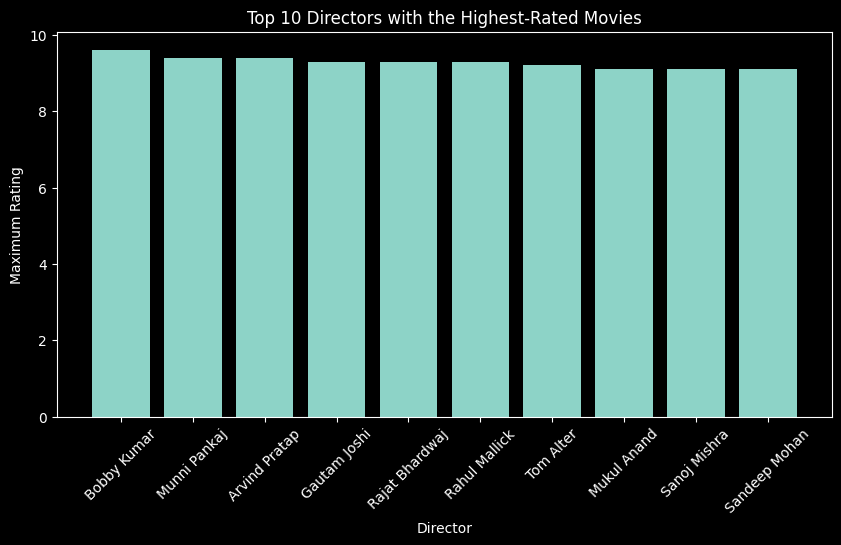

In [30]:
#Bivariate Analysis:Bivariate analysis helps you understand the relationships between two variables
#Top 10 Directors with the Highest-Rated Movies
# Group the data by director and find the maximum rating within each group
directors_max_rating = df.groupby('Director')['Rating'].max()

# Sort the directors by their highest rating in descending order and select the top 10
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 directors with the highest-rated movies
plt.figure(figsize=(10, 5))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=45)
plt.show()

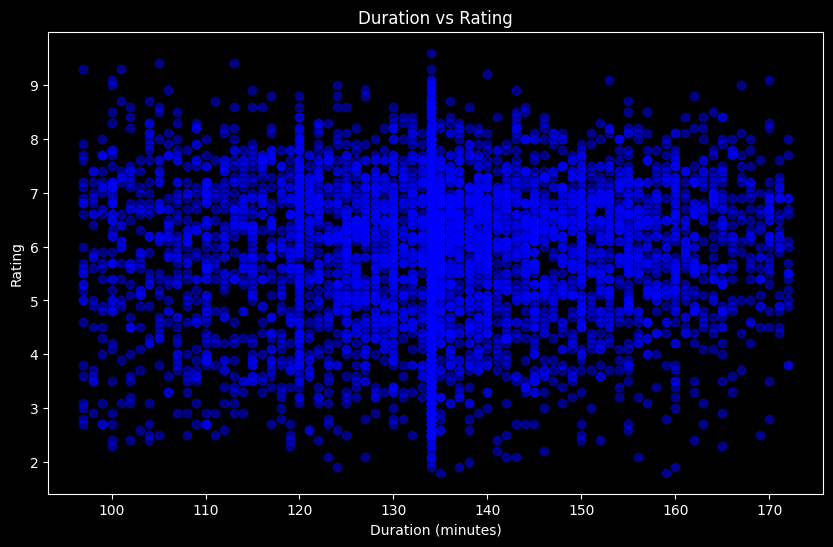

In [31]:
#Duration vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

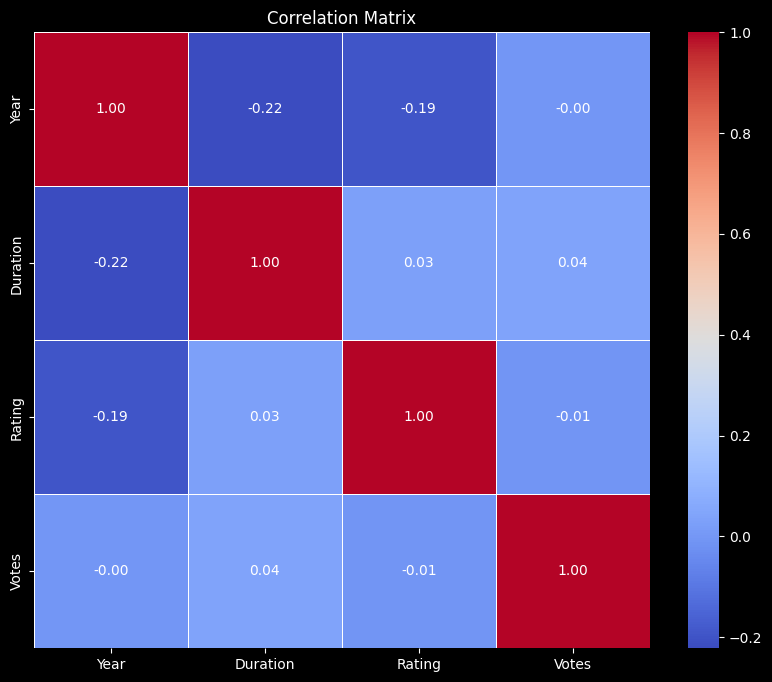

In [32]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix on numeric columns
correlation_matrix = numeric_df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
# Adding title and displaying the plot
plt.title('Correlation Matrix')
plt.show()

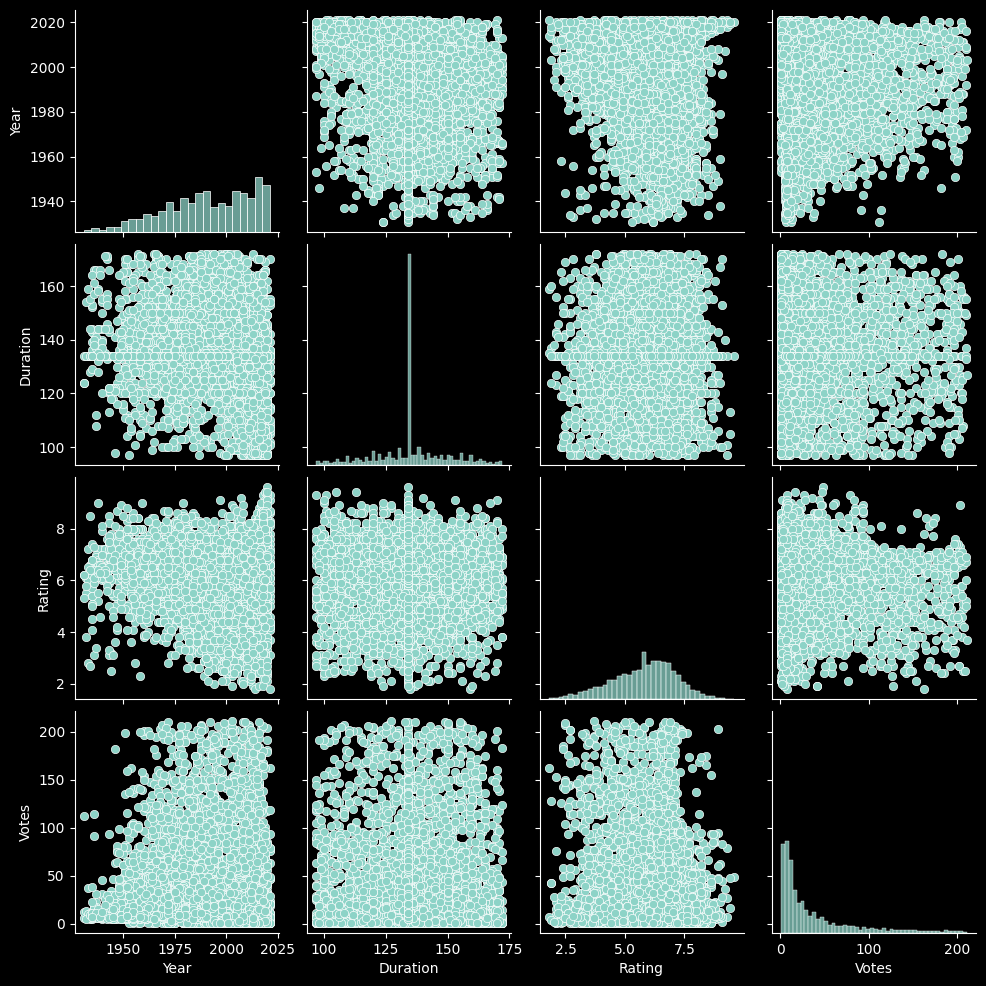

In [33]:
#Pairplot
# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

In [34]:
# prompt: Data Preprocessing
# Assign the variables
# assigning y/ target variable to Rating column for prediction analysis and the rest of the features to independent variable X
# Define features (X) and target variable (y)
X = df.drop('Rating', axis=1)
y = df['Rating']

In [35]:
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
3,@Andheri,2014,116.0,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
4,1:13:7 Ek Tera Saath,2016,120.0,Horror,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani


Highly Correlated Features:
           Year  Duration  Votes
Year       1.0       NaN    NaN
Duration   NaN       1.0    NaN
Votes      NaN       NaN    1.0


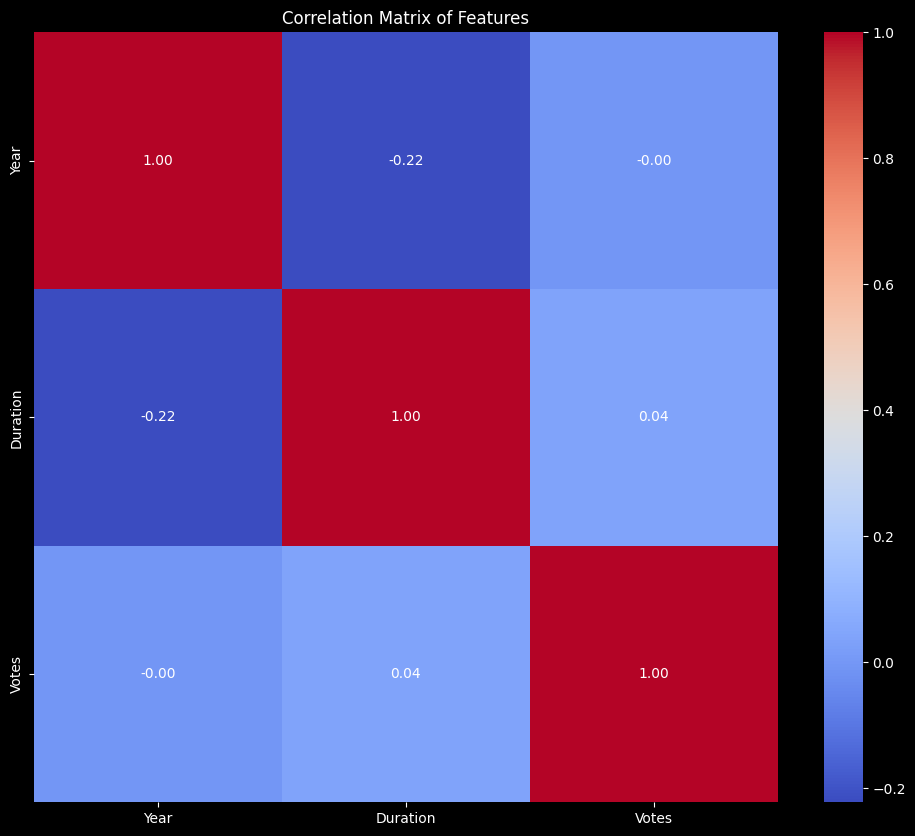

In [36]:
# Select only numeric columns for correlation
numeric_X = X.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_X.corr()

# Find highly correlated features
threshold = 0.8  # Adjust as needed
highly_correlated = correlation_matrix[abs(correlation_matrix) > threshold]

# Print the highly correlated features
print("Highly Correlated Features:\n", highly_correlated)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [37]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [38]:
from sklearn.preprocessing import OneHotEncoder


In [39]:
# One-hot encode the categorical variables
# One-hot encoding is used to convert categorical variables into a binary format, which is suitable for machine learning algorithms

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the numerical features
X_encoded = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Now X_encoded contains the one-hot encoded categorical variables
print(X_encoded.head())

   Year  Duration  Votes  Name_#Gadhvi (He thought he was Gandhi)  \
0  2019     109.0      8                                      1.0   
1  2019     110.0     35                                      0.0   
2  2005     142.0      1                                      0.0   
3  2014     116.0     11                                      0.0   
4  2016     120.0     59                                      0.0   

   Name_#Yaaram  Name_'Ferry'  Name_'Sambandh'  Name_...Yahaan  \
0           0.0           0.0              0.0             0.0   
1           1.0           0.0              0.0             0.0   
2           0.0           0.0              0.0             1.0   
3           0.0           0.0              0.0             0.0   
4           0.0           0.0              0.0             0.0   

   Name_102 Not Out  Name_12 O'Clock  ...  Actor 3_Zarine Ali  \
0               0.0              0.0  ...                 0.0   
1               0.0              0.0  ...                 

In [40]:
import sklearn
print(sklearn.__version__)

1.5.2


In [41]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
3,@Andheri,2014,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
4,1:13:7 Ek Tera Saath,2016,120.0,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
...,...,...,...,...,...,...,...,...,...,...
5893,Zulm Ka Badla,1985,134.0,"Action, Crime, Drama",4.9,11,Chand,K. Prasad,Rakesh Roshan,Anita Raj
5894,Zulm Ki Hukumat,1992,134.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
5895,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5896,Zulm Ko Jala Doonga,1988,134.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand


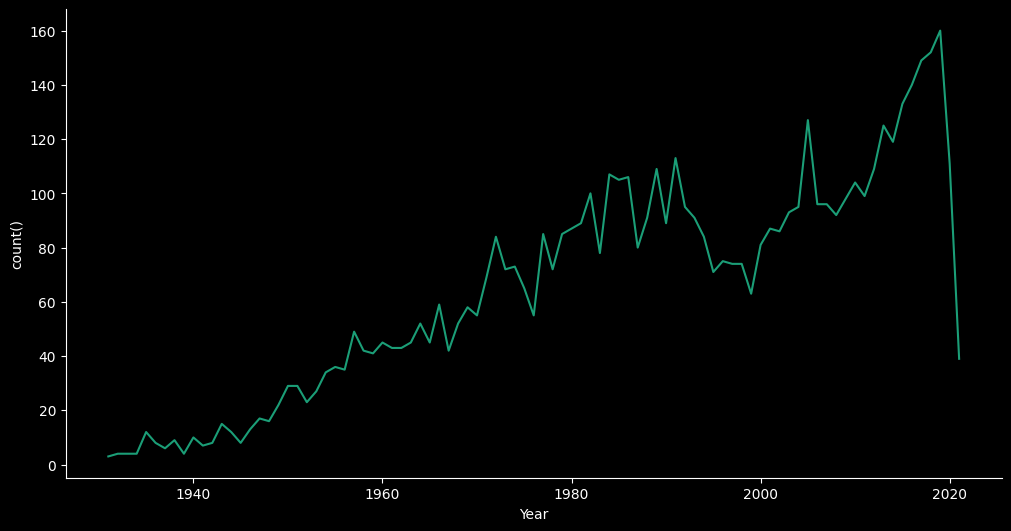

In [42]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

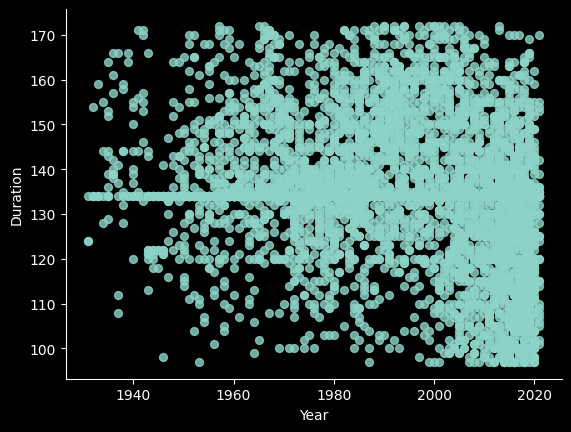

In [43]:
# @title Year vs Duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
3,@Andheri,2014,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
4,1:13:7 Ek Tera Saath,2016,120.0,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
...,...,...,...,...,...,...,...,...,...,...
5893,Zulm Ka Badla,1985,134.0,"Action, Crime, Drama",4.9,11,Chand,K. Prasad,Rakesh Roshan,Anita Raj
5894,Zulm Ki Hukumat,1992,134.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
5895,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5896,Zulm Ko Jala Doonga,1988,134.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand


Year
1931      3
1932      4
1933      4
1934      4
1935     12
       ... 
2017    149
2018    152
2019    160
2020    111
2021     39
Length: 91, dtype: int64


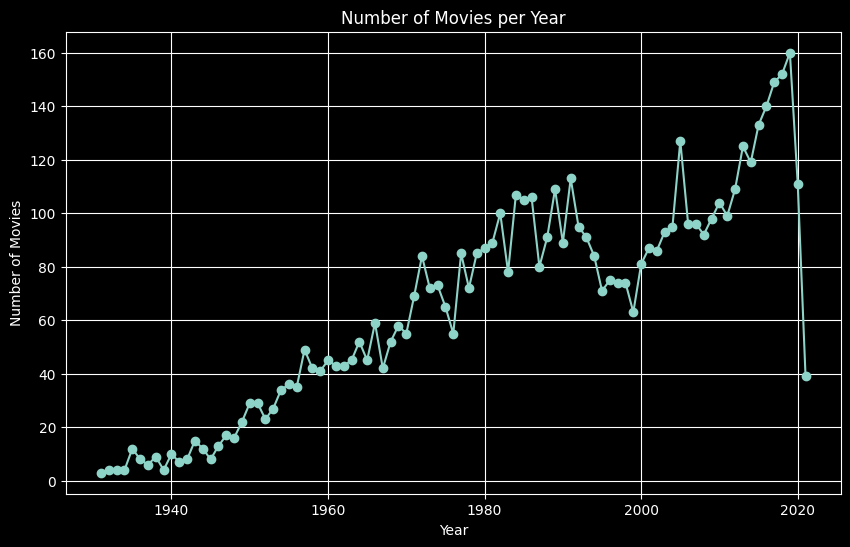

In [48]:
#  Number of Movies each Year
# Assuming the DataFrame 'df' is already loaded as in the provided code.
# Group the data by year and count the number of movies in each year
# The 'Title' column might not exist.  Instead, count the number of rows per year.
movies_per_year = df.groupby('Year').size()  # Change from ['Title'].count() to .size()
# Print the result
print(movies_per_year)
#  Plot the number of movies per year
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Year")
plt.grid(True)
plt.show()

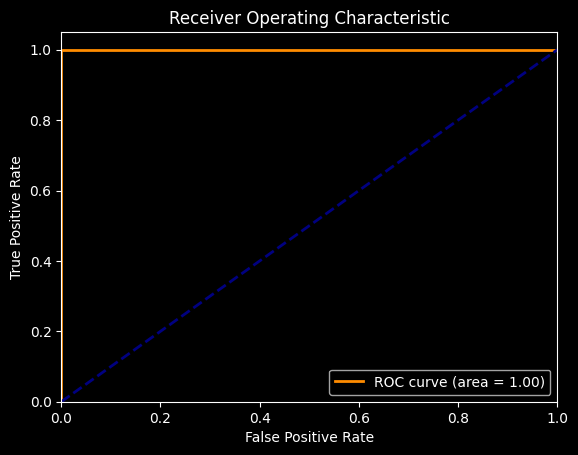

In [50]:
from sklearn.metrics import roc_curve, auc
# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
# Replace these with your actual data
# Example data (replace with your actual predictions)
y_true = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
y_pred_prob = [0.1, 0.3, 0.8, 0.6, 0.2, 0.9, 0.4, 0.7, 0.5, 0.2]

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
# prompt: The goal is to analyze historical movie data and develop a model
# that accurately estimates the rating given to a movie by users or
# critics.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['number']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3559404398305086
R-squared: 0.2207222737052833


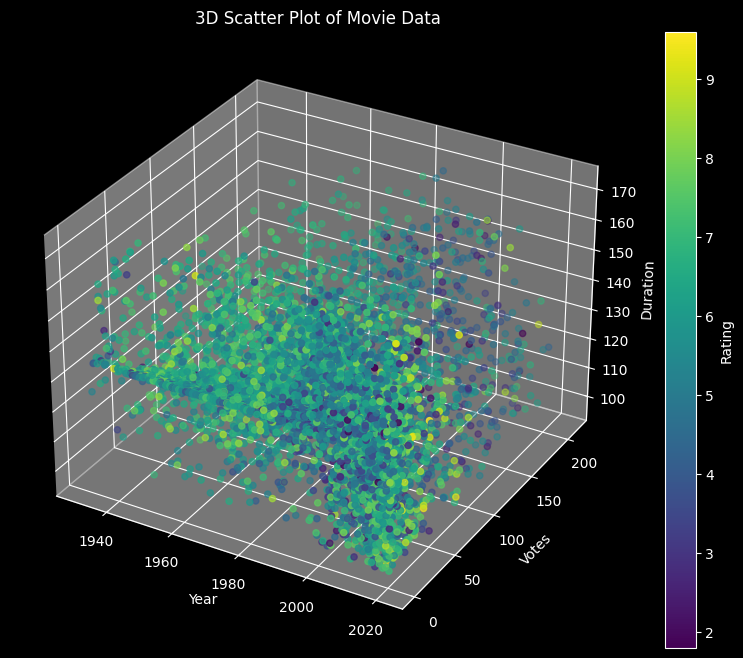

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical features for the 3D plot
features = ['Year', 'Votes', 'Duration']

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the selected features
scatter = ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=df['Rating'], cmap='viridis')

# Set labels and title
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Scatter Plot of Movie Data')


# Add a colorbar
plt.colorbar(scatter, label='Rating')

# Show the plot
plt.show()